## São Paulo's top 10 revenues in each Neibourhood
Hello!! In this notebook my goal is to use data mining to extract the CEP (Zip code) for each neighbourhood in the city of Sao Paulo. 
The following step is to use Foursquare API to return the top 10 venues type in that neighbourhood, listing the best possibilities for a future shop owner to understand where its venue may be more critical.

In [228]:
import pandas as pd
import json
import numpy as np
import requests
import folium as fl
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
pd.set_option('display.max_rows',20)

In [3]:
Extract = pd.read_csv('SP_Data.csv',encoding='cp1252',sep=';')
Data = Extract[['CEP','Bairro']]
Data.head()
Data = Data.rename(columns={'Bairro' : 'Bairro/Cidade'})

In [4]:
Data['Bairro/Cidade']

0       SANTANA – Santana / Carandiru / Vila Guilherme...
1       VILA MARIA – Vila Maria / Parque Novo Mundo / ...
2       JAÇANÃ E TUCURUVI – Tucuruvi / Jaçanã / Parque...
3       TREMEMBÉ – Jardim Tremembé / Barro Branco / Ág...
4       MANDAQUI – Mandaqui / Imirim / Lausane Paulist...
                              ...                        
1006                                                  NaN
1007                                                  NaN
1008                                                  NaN
1009                                                  NaN
1010                                                  NaN
Name: Bairro/Cidade, Length: 1011, dtype: object

In [5]:
Data.dropna(axis=0, inplace=True)   #Droping NaN values
for i, rows in Data.iterrows():
    Data.loc[i,'Bairro/Cidade'] = Data.loc[i,'Bairro/Cidade'].split(sep='–')[0]   #Removing subdist
    Data.loc[i,'Bairro/Cidade'] = Data.loc[i,'Bairro/Cidade'] + ', SAO PAULO'     # Adding Sao paulo
    print(Data.loc[i,'Bairro/Cidade'])
Data.head()

SANTANA , SAO PAULO
VILA MARIA , SAO PAULO
JAÇANÃ E TUCURUVI , SAO PAULO
TREMEMBÉ , SAO PAULO
MANDAQUI , SAO PAULO
CASA VERDE , SAO PAULO
CACHOEIRINHA , SAO PAULO
LIMÃO , SAO PAULO
BRASILÂNDIA , SAO PAULO
FREGUESIA DO Ó , SAO PAULO
BRÁS , SAO PAULO
MOÓCA , SAO PAULO
SÃO LUCAS , SAO PAULO
ANÁLIA FRANCO , SAO PAULO
CARRÃO E ARICANDUVA , SAO PAULO
VILA MATILDE , SAO PAULO
PENHA , SAO PAULO
CANGAÍBA , SAO PAULO
ERMELINO MATARAZZO , SAO PAULO
SÃO MATEUS , SAO PAULO
SÃO MIGUEL PAULISTA, SAO PAULO
ITAIM PAULISTA, SAO PAULO
ITAQUERA, SAO PAULO
SÃO MATEUS, SAO PAULO
GUAIANAZES, SAO PAULO
MOEMA E VILA MARIANA (OESTE) , SAO PAULO
SAÚDE E VILA MARIANA (LESTE) , SAO PAULO
IPIRANGA , SAO PAULO
JABAQUARA , SAO PAULO
CIDADE ADEMAR , SAO PAULO
ITAIM BIBI , SAO PAULO
CAMPO BELO , SAO PAULO
SANTO AMARO , SAO PAULO
CIDADE DUTRA E GRAJAÚ , SAO PAULO
GUARAPIRANGA , SAO PAULO
LAPA E PERDIZES , SAO PAULO
PIRITUBA E JARAGUÁ , SAO PAULO
PERUS , SAO PAULO
JAGUARÉ E LEOPOLDINA , SAO PAULO
PINHEIROS , SAO PAULO
BU

,CEP,Bairro/Cidade
0,2000.0,"SANTANA , SAO PAULO"
1,2100.0,"VILA MARIA , SAO PAULO"
2,2200.0,"JAÇANÃ E TUCURUVI , SAO PAULO"
3,2300.0,"TREMEMBÉ , SAO PAULO"
4,2400.0,"MANDAQUI , SAO PAULO"


In [6]:
Data.dropna(axis=0, inplace=True)
Data.head(n=100)

,CEP,Bairro/Cidade
0,2000.0,"SANTANA , SAO PAULO"
1,2100.0,"VILA MARIA , SAO PAULO"
2,2200.0,"JAÇANÃ E TUCURUVI , SAO PAULO"
3,2300.0,"TREMEMBÉ , SAO PAULO"
4,2400.0,"MANDAQUI , SAO PAULO"
...,...,...
82,8900.0,"Guararema, SAO PAULO"
83,7500.0,"Santa Izabel, SAO PAULO"
84,8940.0,"Biritiba Mirim, SAO PAULO"
85,8970.0,"Salesópolis, SAO PAULO"


In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="SaoPauloData")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)      
Data['Loc'] = Data['Bairro/Cidade'].apply(geocode)
Data

,CEP,Bairro/Cidade,Loc
0,2000.0,"SANTANA , SAO PAULO","(São Paulo, Irituia, Microrregião de Guamá, Re..."
1,2100.0,"VILA MARIA , SAO PAULO","(Vila Maria, São Paulo, Região Imediata de São..."
2,2200.0,"JAÇANÃ E TUCURUVI , SAO PAULO","(Rua Paulo Prado, Jaçanã, Tucuruvi, São Paulo,..."
3,2300.0,"TREMEMBÉ , SAO PAULO","(Tremembé, Região Imediata de Taubaté-Pindamon..."
4,2400.0,"MANDAQUI , SAO PAULO","(Mandaqui, São Paulo, Região Imediata de São P..."
...,...,...,...
82,8900.0,"Guararema, SAO PAULO","(Guararema, Região Imediata de São Paulo, Regi..."
83,7500.0,"Santa Izabel, SAO PAULO","(São Paulo, Avenida Mandacaru, Conjunto Reside..."
84,8940.0,"Biritiba Mirim, SAO PAULO","(Biritiba-Mirim, Região Imediata de São Paulo,..."
85,8970.0,"Salesópolis, SAO PAULO","(Salesópolis, Região Imediata de São Paulo, Re..."


In [8]:
Data.loc[3,'Loc'].latitude

-22.95714

In [9]:
for i,rows in Data.iterrows():
    if Data.loc[i,'Loc'] is not None:
        Data.loc[i,'Lat'] = Data.loc[i,'Loc'].latitude
        Data.loc[i,'Long'] = Data.loc[i,'Loc'].longitude

In [10]:
Data.dropna()   #A little bit of housecleaning
Data.head()

,CEP,Bairro/Cidade,Loc,Lat,Long
0,2000.0,"SANTANA , SAO PAULO","(São Paulo, Irituia, Microrregião de Guamá, Re...",-2.007640,-47.396612
1,2100.0,"VILA MARIA , SAO PAULO","(Vila Maria, São Paulo, Região Imediata de São...",-23.513184,-46.589156
2,2200.0,"JAÇANÃ E TUCURUVI , SAO PAULO","(Rua Paulo Prado, Jaçanã, Tucuruvi, São Paulo,...",-23.473174,-46.583933
3,2300.0,"TREMEMBÉ , SAO PAULO","(Tremembé, Região Imediata de Taubaté-Pindamon...",-22.957140,-45.547526
4,2400.0,"MANDAQUI , SAO PAULO","(Mandaqui, São Paulo, Região Imediata de São P...",-23.457940,-46.641243


Defining foursquare credentials for obtaining the list of venues around the latitudes and longitudes

In [201]:
CLIENT_ID = '4FJLCTTSV1XVYS02GV54ZGNDTKMENAXSKOYPEWWPHETZNJBP'
CLIENT_SECRET = '03A4KBSMA4453QBICZSHLICABL0AHY2CW1RDKNSZJMXEMYZU' 
VERSION = '20180604'
LIMIT = 50
radius = 10000
print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
url_vec = []
result_vec = []

Credentials:
CLIENT_ID: 4FJLCTTSV1XVYS02GV54ZGNDTKMENAXSKOYPEWWPHETZNJBP
CLIENT_SECRET:03A4KBSMA4453QBICZSHLICABL0AHY2CW1RDKNSZJMXEMYZU


In [268]:
for i, rows in Data.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                               CLIENT_SECRET,
                                                                                                                               Data.loc[i,'Lat'],
                                                                                                                               Data.loc[i,'Long'],
                                                                                                                               VERSION,
                                                                                                                               radius,
                                                                                                                               LIMIT)
    url_vec.append(url)
    result = requests.get(url).json()
    result_vec.append(result["response"])
    

### Data Cleaning

The JSON file needs to be treated as it holds many different types of information. The goal here is count now how many different types os categories are listed per neighbourhood (the iteration will be made with a for loop within the result_vec variable, a vector that holds all results for each single neighbourhood.

In [203]:
print(json.dumps(result_vec[2]["groups"][0]["items"][1], indent=4))
# Getting familiarized with the indexation to show us the vector of venues ----> OF NEIGHBOURHOOD [2]

{
    "reasons": {
        "count": 0,
        "items": [
            {
                "summary": "This spot is popular",
                "type": "general",
                "reasonName": "globalInteractionReason"
            }
        ]
    },
    "venue": {
        "id": "4c0faed196fc952168f5c0cb",
        "name": "Padaria Jardim Brasil",
        "location": {
            "address": "Av. Jardim Jap\u00e3o, 1298",
            "crossStreet": "Av. Roland Garros",
            "lat": -23.479246030925786,
            "lng": -46.58203501674225,
            "labeledLatLngs": [
                {
                    "label": "display",
                    "lat": -23.479246030925786,
                    "lng": -46.58203501674225
                }
            ],
            "distance": 703,
            "postalCode": "02221-000",
            "cc": "BR",
            "city": "S\u00e3o Paulo",
            "state": "SP",
            "country": "Brasil",
            "formattedAddress": [
             

In [269]:
results_vec[1]

NameError: name 'results_vec' is not defined

In [209]:
print(json.dumps(result_vec[2]["groups"][0]["items"][1]["venue"]["location"], indent=4))
#Learning how many layers I have to access a single venue within a neighbourhood

{
    "address": "Av. Jardim Jap\u00e3o, 1298",
    "crossStreet": "Av. Roland Garros",
    "lat": -23.479246030925786,
    "lng": -46.58203501674225,
    "labeledLatLngs": [
        {
            "label": "display",
            "lat": -23.479246030925786,
            "lng": -46.58203501674225
        }
    ],
    "distance": 703,
    "postalCode": "02221-000",
    "cc": "BR",
    "city": "S\u00e3o Paulo",
    "state": "SP",
    "country": "Brasil",
    "formattedAddress": [
        "Av. Jardim Jap\u00e3o, 1298 (Av. Roland Garros)",
        "S\u00e3o Paulo, SP",
        "02221-000",
        "Brasil"
    ]
}


In [206]:
#Using try and except to pass the Data in neighbourhoods that didn't have many venues recorded
# Iteration to create a DataSet with all the venues, their categories and neighbourhoods.
NeigCat = (pd.DataFrame())
counter = 0
for i in range(len(result_vec)):
    try:
                for j in range(len(result_vec[i]["groups"][0]["items"])):
                    name = result_vec[i]["groups"][0]["items"][j]["venue"]["name"]
                    category = result_vec[i]["groups"][0]["items"][j]["venue"]["categories"][0]["shortName"]
                    NeigCat.loc[counter,"Bairro"] = Data.loc[i,'Bairro/Cidade'].replace(', SAO PAULO',"") #Removing the city that was added earlier
                    NeigCat.loc[counter,"Name"] = name
                    NeigCat.loc[counter,"Category"] = category
                    counter = counter + 1
    except KeyError:
        pass
NeigCat

,Bairro,Name,Category
0,VILA MARIA,Nação Nordestina,Northeastern Brazilian
1,VILA MARIA,Parque do Piqueri,Park
2,VILA MARIA,ADPM - Associação Desportiva da Polícia Militar,Entertainment
3,VILA MARIA,Cinemark Bradesco Prime,Movie Theater
4,VILA MARIA,Mocotó Restaurante & Cachaçaria,Northeastern Brazilian
...,...,...,...
3844,Juquitiba,Restaurante 81,Brazilian
3845,Juquitiba,Sitio Nosso Sonho,Farm
3846,Juquitiba,Juquitiba Caramuru,Campground
3847,Juquitiba,JC Mercado,Steakhouse


In [207]:
print ('Number of venues assessed: ',len(NeigCat))
NeigCat.head(1500)

Number of venues assessed:  3849


,Bairro,Name,Category
0,VILA MARIA,Nação Nordestina,Northeastern Brazilian
1,VILA MARIA,Parque do Piqueri,Park
2,VILA MARIA,ADPM - Associação Desportiva da Polícia Militar,Entertainment
3,VILA MARIA,Cinemark Bradesco Prime,Movie Theater
4,VILA MARIA,Mocotó Restaurante & Cachaçaria,Northeastern Brazilian
...,...,...,...
1495,CAMPO BELO,Torta no Quintal,Pie Shop
1496,CAMPO BELO,Ruella,French
1497,CAMPO BELO,Pizzaria Sagrada Família,Pizza
1498,CAMPO BELO,Tartelier Patisserie,Pastry


In [208]:
NeigCat.describe()

,Bairro,Name,Category
count,3849,3849,3849
unique,83,1729,236
top,São Caetano do Sul,Bacio di Latte,Pizza
freq,50,69,203


Sao Paulo is famous for being a place with lots of bakeries and we know now that the most common venue is Pizza Shacks and not Bakeries.

Now we want to create a DF with the neighbourhoods as row indexers and their most frequent type of venue to append at the map that we'll draw soon.

In [261]:
MostNeig = (pd.DataFrame())
MostNeig = NeigCat.groupby(['Bairro']).agg(lambda x:x.value_counts().index[0]) #Aggregating per most common Category
MostNeig.drop(columns=['Name'], inplace=True)
MostNeig.rename(columns={"Bairro": "Neigh", "Category": "Top_venue"}, inplace = True)
MostNeig
MostNeig.reset_index(inplace = True)

In [270]:
MostNeig

,Bairro,Top_venue
0,ANÁLIA FRANCO,Gym / Fitness
1,Arujá,Pizza
2,BOM RETIRO,Ice Cream
3,BRASILÂNDIA,Bar
4,BRÁS,Cultural Center
...,...,...
78,TREMEMBÉ,Pizza
79,Taboão da Serra,Middle Eastern
80,VILA BUARQUE,Ice Cream
81,VILA MARIA,Pizza


### Result

Finally plotting the Folium map with the information of top venue per neighbourhood.

In [266]:
SP_latlong =-23.533773,-46.625290
venues_map = fl.Map(location=SP_latlong, zoom_start=15)
for i in range(len(MostNeig)):
    try:
        latitude = Data.loc[i,"Lat"]
        longitude = Data.loc[i,"Long"]
        Neigh = Data.loc[i,'Bairro/Cidade'].replace(', SAO PAULO',"")
        label = Neigh +', '+ MostNeig.loc[i,'Top_venue'] + ' is the most common venue around here.'
        #label = Neigh + 'Most common Ve' MostNeig.loc[Neigh,'Top_venue']
        
        #pop = MostNeig.loc[i,'Top_venue']
        fl.CircleMarker([latitude, longitude],
                        radius=10,
                        fill=True,
                        popup=label,
                        color='red',
                        fill_color='red',
                        fill_opacity=0.6
                        ).add_to(venues_map)
    except ValueError:
        pass

venues_map

In [294]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
DF = pd.DataFrame(NeigCat.groupby(['Category']).count()
DF.sort_values(by='Name', ascending=False,inplace=True)

SyntaxError: invalid syntax (<ipython-input-294-875f1f3a5206>, line 5)

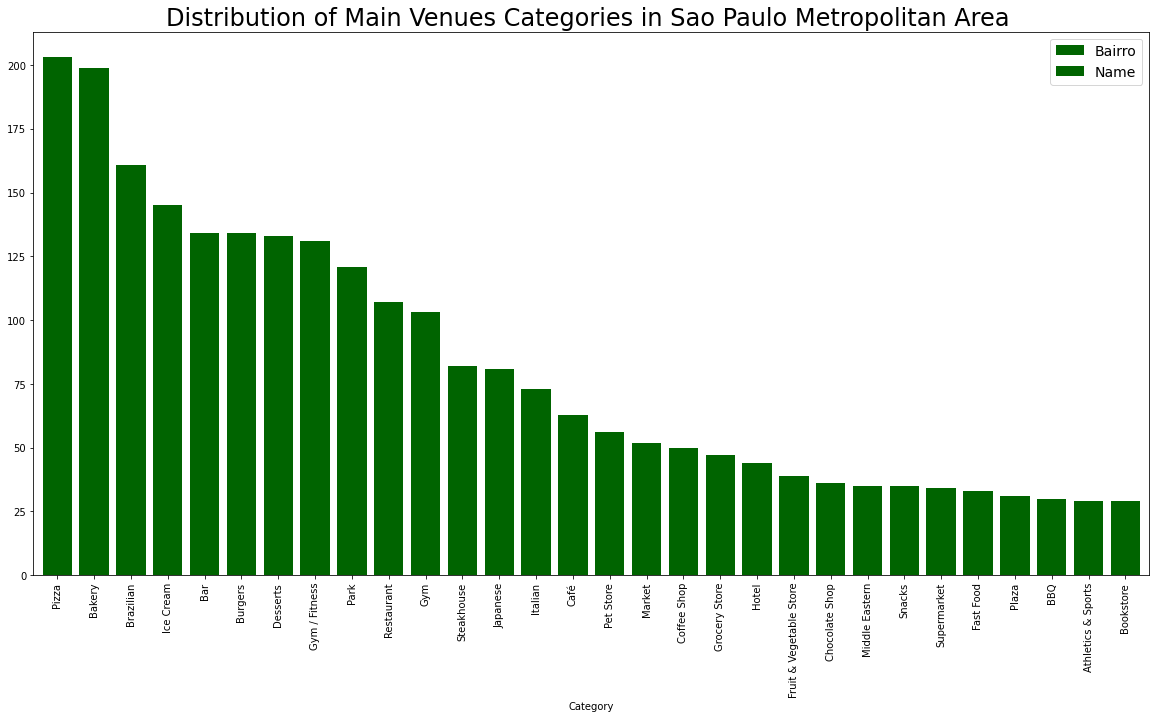

In [295]:
xlegend = DF.columns
ax = DF[:30].plot(kind='bar',
              figsize=[20,10],
              width=0.8,
              color = 'darkgreen')
plt.legend(labels=xlegend,
           fontsize=14)
plt.title('Distribution of Main Venues Categories in Sao Paulo Metropolitan Area ',
          fontsize=24)
plt.show()

In [293]:
DF.sort_values(by='Name', ascending=False,inplace=True)
DF

,Bairro,Name
Category,,
Pizza,203,203
Bakery,199,199
Brazilian,161,161
Ice Cream,145,145
Bar,134,134
...,...,...
Harbor / Marina,1,1
Herbs & Spices Store,1,1
Hotel Bar,1,1
